In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns

In [95]:
df_validation = pd.read_csv(r'../../data/tidy/energy_validation_april2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [96]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [97]:
df_validation

,Unnamed: 0,timestamp,equipment_id,gallons,date
0,58932,2022-04-01 00:04:00,3213,46.9,2022-04-01
1,58933,2022-04-01 00:11:00,3303,16.0,2022-04-01
2,58934,2022-04-01 00:19:00,3322,31.7,2022-04-01
3,58935,2022-04-01 00:28:00,3312,35.2,2022-04-01
4,58936,2022-04-01 00:33:00,3307,33.4,2022-04-01
...,...,...,...,...,...
2997,4682,4/26/2022 19:12,7816,51.6,2022-04-26
2998,4683,4/27/2022 20:39,7816,19.3,2022-04-27
2999,4684,4/28/2022 14:02,7816,14.0,2022-04-28
3000,4685,4/29/2022 19:10,7816,18.4,2022-04-29


In [98]:
df_model

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,ServiceDateTime,Unnamed: 0.1,Unnamed: 0.1.1,DateKey,CalendarDate,Year,...,geometry,dist,Speed,Acceleration,time_delta,time_delta_in_seconds,Powertrain,VehicleModel,Vehicle_mass,FuelRate/Energy
0,0,1297419,1297419,2391,2022-04-29 14:01:44,2391,1273034,8788,2022-04-29 00:00:00.000,2022,...,POINT (-72.52602 42.14098),0.000000,0.000000,0.000000,0,0.0,electric,New Flyer 35 electric,26900.0,0.000000
1,1,1299038,1299038,2392,2022-04-29 14:28:20,2392,1273037,8788,2022-04-29 00:00:00.000,2022,...,POINT (-72.65278 42.19514),8.829565,32.052117,0.005579,0 days 00:26:36,1596.0,electric,New Flyer 35 electric,26900.0,10.919433
2,2,1299039,1299039,2393,2022-04-29 14:28:20,2393,1273500,8788,2022-04-29 00:00:00.000,2022,...,POINT (-72.65278 42.19514),0.000000,0.000000,0.000000,0 days 00:00:00,0.0,electric,New Flyer 35 electric,26900.0,0.000000
3,3,1299250,1299250,2394,2022-04-29 14:30:55,2394,1273501,8788,2022-04-29 00:00:00.000,2022,...,POINT (-72.64553 42.20302),0.526585,19.682810,0.035274,0 days 00:02:35,155.0,electric,New Flyer 35 electric,26900.0,0.807272
4,4,1299272,1299272,2395,2022-04-29 14:31:09,2395,1273502,8788,2022-04-29 00:00:00.000,2022,...,POINT (-72.64369 42.20166),0.130185,53.874613,0.678410,0 days 00:00:14,14.0,electric,New Flyer 35 electric,26900.0,1.329511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127243,1127243,1361526,1361526,1361544,2022-04-30 23:54:20,1361544,1325566,8789,2022-04-30 00:00:00.000,2022,...,POINT (-72.53185 42.38201),0.254140,10.517075,0.003673,0 days 00:02:20,140.0,conventional,0,0.0,0.000000
1127244,1127244,1361530,1361530,1361545,2022-04-30 23:55:24,1361545,1325567,8789,2022-04-30 00:00:00.000,2022,...,POINT (-72.5327 42.375),0.156799,14.194300,0.015960,0 days 00:01:04,64.0,conventional,0,0.0,0.000000
1127245,1127245,1361539,1361539,1361546,2022-04-30 23:56:47,1361546,1325568,8789,2022-04-30 00:00:00.000,2022,...,POINT (-72.53357 42.36864),0.144950,10.117888,-0.013643,0 days 00:01:23,83.0,conventional,0,0.0,0.000000
1127246,1127246,1361541,1361541,1361547,2022-04-30 23:57:32,1361547,1325569,8789,2022-04-30 00:00:00.000,2022,...,POINT (-72.53556 42.3656),0.151259,19.474153,0.057755,0 days 00:00:45,45.0,conventional,0,0.0,0.000000


In [99]:
df_model_diesel = df_model[df_model.Powertrain != 'electric'].copy()

In [103]:
df_model_diesel_filtered=df_model_diesel[df_model_diesel['FuelRate/Energy']<=1].copy()

In [104]:
df_model_diesel_filtered

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,ServiceDateTime,Unnamed: 0.1,Unnamed: 0.1.1,DateKey,CalendarDate,Year,...,geometry,dist,Speed,Acceleration,time_delta,time_delta_in_seconds,Powertrain,VehicleModel,Vehicle_mass,FuelRate/Energy
27848,27848,1415,1415,33217,2022-04-01 05:55:38,33217,43687,8760,2022-04-01 00:00:00.000,2022,...,POINT (-72.52602 42.14099),0.000000,0.000000,0.000000,0,0.0,conventional,Gillig conventional,26440.0,0.000000
27849,27849,1591,1591,33219,2022-04-01 06:04:01,33219,43689,8760,2022-04-01 00:00:00.000,2022,...,POINT (-72.54524 42.13793),0.000000,0.000000,0.000000,0 days 00:08:23,503.0,conventional,Gillig conventional,26440.0,0.001660
27850,27850,1592,1592,33218,2022-04-01 06:04:01,33218,41707,8760,2022-04-01 00:00:00.000,2022,...,POINT (-72.54524 42.13793),1.329491,15.313257,0.008457,0 days 00:00:00,0.0,conventional,Gillig conventional,26440.0,0.102148
27851,27851,1646,1646,33220,2022-04-01 06:05:51,33220,41708,8760,2022-04-01 00:00:00.000,2022,...,POINT (-72.54618 42.13219),0.135532,7.138389,0.018026,0 days 00:01:50,110.0,conventional,Gillig conventional,26440.0,0.051260
27852,27852,1656,1656,33221,2022-04-01 06:06:13,33221,41709,8760,2022-04-01 00:00:00.000,2022,...,POINT (-72.54585 42.12965),0.057365,15.106779,0.100611,0 days 00:00:22,22.0,conventional,Gillig conventional,26440.0,0.204526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127243,1127243,1361526,1361526,1361544,2022-04-30 23:54:20,1361544,1325566,8789,2022-04-30 00:00:00.000,2022,...,POINT (-72.53185 42.38201),0.254140,10.517075,0.003673,0 days 00:02:20,140.0,conventional,0,0.0,0.000000
1127244,1127244,1361530,1361530,1361545,2022-04-30 23:55:24,1361545,1325567,8789,2022-04-30 00:00:00.000,2022,...,POINT (-72.5327 42.375),0.156799,14.194300,0.015960,0 days 00:01:04,64.0,conventional,0,0.0,0.000000
1127245,1127245,1361539,1361539,1361546,2022-04-30 23:56:47,1361546,1325568,8789,2022-04-30 00:00:00.000,2022,...,POINT (-72.53357 42.36864),0.144950,10.117888,-0.013643,0 days 00:01:23,83.0,conventional,0,0.0,0.000000
1127246,1127246,1361541,1361541,1361547,2022-04-30 23:57:32,1361547,1325569,8789,2022-04-30 00:00:00.000,2022,...,POINT (-72.53556 42.3656),0.151259,19.474153,0.057755,0 days 00:00:45,45.0,conventional,0,0.0,0.000000


In [105]:
df_model_diesel_filtered['Fuel_consumption']=df_model_diesel_filtered['FuelRate/Energy']*df_model_diesel_filtered['time_delta_in_seconds']

In [106]:
#df_model = df_model.fillna(0)
#df_model['FuelRate/Energy'] = pd.to_numeric(df_model['FuelRate/Energy'])
df_daily_fuel = df_model_diesel_filtered.groupby(['Date']).agg({'Fuel_consumption':'sum'})[['Fuel_consumption']].reset_index()
df_daily_fuel['Fuel_consumption']=(df_daily_fuel['Fuel_consumption'])/3.78541 # 1 gallon = 3.78541 liter
#df_daily_fuel['FuelRate/Energy']=(24*60*60*df_daily_fuel['FuelRate/Energy'])/3.78541 # 1 gallon = 3.78541 liter
df_daily_fuel

,Date,Fuel_consumption
0,2022-04-01,48327.685206
1,2022-04-02,30317.457384
2,2022-04-03,11758.605895
3,2022-04-04,45484.756987
4,2022-04-05,45790.261328
5,2022-04-06,47293.475187
6,2022-04-07,46567.277848
7,2022-04-08,45878.222067
8,2022-04-09,31675.069697
9,2022-04-10,11638.876578


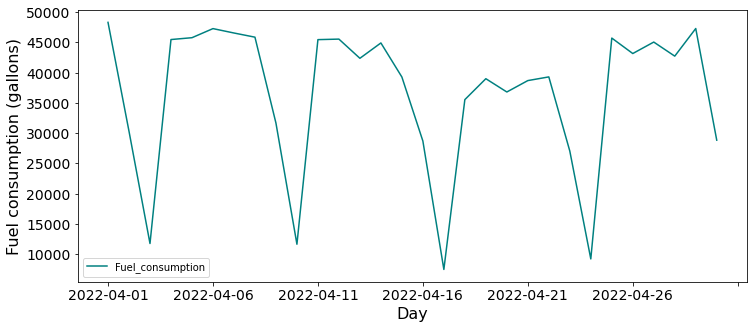

In [108]:
df_daily_fuel.plot(x="Date", y="Fuel_consumption", color='teal', figsize=(12, 5))
plt.ylabel("Fuel consumption (gallons)", fontsize=16)
plt.xlabel("Day", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(r'../../figures/fuel-consumption-model.png', dpi=400, bbox_inches='tight')
plt.show()

In [110]:
df_daily_fuel = df_model_diesel_filtered.groupby(['Date']).agg({'FuelRate/Energy':'mean'})[['FuelRate/Energy']].reset_index()
df_daily_fuel['FuelRate/Energy']=(24*60*60*df_daily_fuel['FuelRate/Energy'])/3.78541 # 1 gallon = 3.78541 liter
df_daily_fuel

,Date,FuelRate/Energy
0,2022-04-01,2039.720733
1,2022-04-02,2053.785311
2,2022-04-03,1826.269061
3,2022-04-04,2104.662094
4,2022-04-05,2068.230324
5,2022-04-06,2066.905808
6,2022-04-07,2092.530620
7,2022-04-08,1841.672187
8,2022-04-09,1916.563950
9,2022-04-10,1893.327750


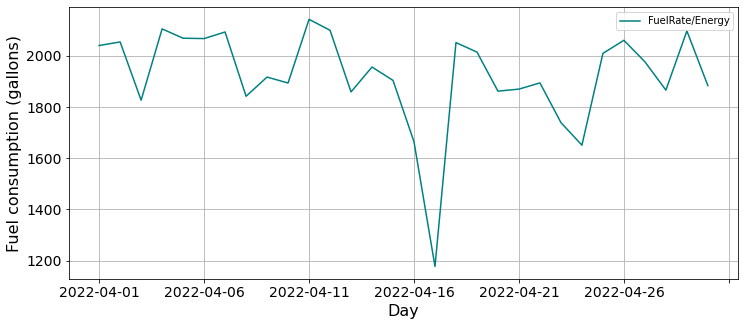

In [113]:
df_daily_fuel.plot(x="Date", y="FuelRate/Energy", color='teal', figsize=(12, 5))
plt.ylabel("Fuel consumption (gallons)", fontsize=16)
plt.xlabel("Day", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig(r'../../figures/fuel-consumption-model.png', dpi=400, bbox_inches='tight')
plt.show()